In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [2]:
df = pd.read_csv('Social_Network_Ads(3).csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
x = df.iloc[:, 2:4].values
y = df.iloc[:, -1].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
classifier = RandomForestClassifier(n_estimators=12, criterion='entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=12)

In [7]:
y_pred = classifier.predict(x_test)

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[72  7]
 [ 5 36]]


C:\Users\hp\AppData\Local\Temp\ipykernel_312\2843866165.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


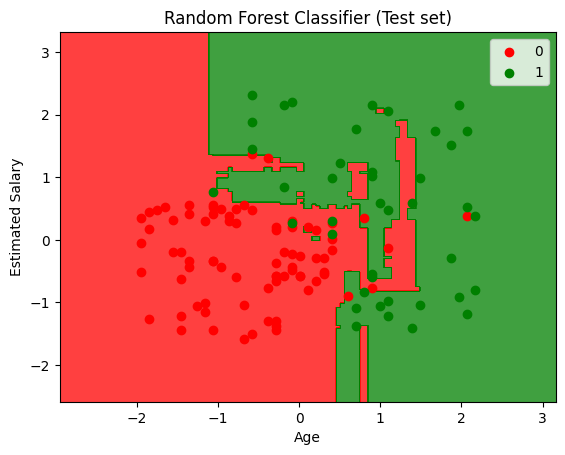

In [9]:
x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
    
plt.title('Random Forest Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [10]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy:  90.0


In my opinion:

The Random Forest classifier achieved an accuracy of 90.0% in predicting buyers of the new mobile phone, which is slightly lower than the 93.0% accuracy achieved by SVM in lab#5. Both Random Forest and SVM are effective models for classification tasks, but the choice between them depends on factors like data nature, interpretability needs, and the trade-off between accuracy and model complexity.